In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix  


In [3]:
trainset = pd.read_csv("/home/dragneel/Documents/DataScience/Dataset-ori-after-C5.0/Trainingset.csv")
testset = pd.read_csv("/home/dragneel/Documents/DataScience/Dataset-ori-after-C5.0/testingset.csv")

In [4]:
x_train = trainset.drop(["Family"], axis=1)
x_train.head(10)

,2Grammed_APICalls_#0,2Grammed_APICalls_#1,2Grammed_APICalls_#2,2Grammed_APICalls_#3,2Grammed_APICalls_#4,2Grammed_APICalls_#5,2Grammed_APICalls_#8,2Grammed_APICalls_#11,2Grammed_APICalls_#12,2Grammed_APICalls_#13,...,FIN_Flag_Count,PSH_Flag_Count,URG_Flag_Count,Init_Win_bytes_backward,act_data_pkt_fwd,Active_Std,Active_Min,Idle_Mean,Idle_Std,Idle_Min
0,0,42,0,0,0,0,0,0,0,0,...,0,14,6,56248,48,281828,15653804,170240589,19488345,155416258
1,2,0,0,0,0,0,0,0,0,0,...,0,12,6,67912,52,438112,5271904,166045107,8283170,159763065
2,0,40,0,0,0,0,0,0,0,0,...,1,18,9,105631,62,607301,16789493,246965228,22019770,230197339
3,0,43,0,0,0,0,0,0,0,0,...,1,19,8,102823,68,540635,19626959,218034819,31463640,194688432
4,2,43,0,0,0,0,0,0,0,0,...,1,17,8,94374,59,334061,17539051,200495551,20186565,185179596
5,1,49,0,0,0,0,0,0,0,0,...,1,15,7,87748,55,183305,16902074,217349829,15946075,205552250
6,0,2,0,0,0,0,0,0,0,0,...,1,19,12,137256,89,1139999,9542941,283416561,18705949,268107385
7,0,0,0,0,0,0,0,0,0,0,...,0,16,10,171179,92,984013,5975211,330046674,21655290,313110640
8,0,0,0,0,0,0,0,0,0,0,...,0,13,7,99579,45,368684,6140808,152739489,19663481,138483459
9,0,0,0,0,0,0,0,0,0,0,...,0,7,4,48574,32,448726,4027266,103643454,8976736,96960113


In [5]:
y_train = trainset["Family"]
y_train.head(10)


0        koler
1        koler
2        koler
3        koler
4        koler
5        koler
6       svpeng
7       svpeng
8    lockerpin
9    lockerpin
Name: Family, dtype: object

In [6]:
x_test = testset.drop(["Family"], axis=1)
x_test.head(10)

,2Grammed_APICalls_#0,2Grammed_APICalls_#1,2Grammed_APICalls_#2,2Grammed_APICalls_#3,2Grammed_APICalls_#4,2Grammed_APICalls_#5,2Grammed_APICalls_#8,2Grammed_APICalls_#11,2Grammed_APICalls_#12,2Grammed_APICalls_#13,...,FIN_Flag_Count,PSH_Flag_Count,URG_Flag_Count,Init_Win_bytes_backward,act_data_pkt_fwd,Active_Std,Active_Min,Idle_Mean,Idle_Std,Idle_Min
0,1,8,3,1343,24,52,1580,15,1,4,...,2,16,7,100613,51,422979,4916083,59639522,6672267,54683666
1,0,0,0,2,1,0,1,0,0,0,...,0,9,5,51055,41,400409,5001727,116112891,12096699,106885087
2,399,268,4,73,2,0,70,0,0,1,...,1,21,17,122691,68,885018,6277498,159824469,12803536,150233633
3,2,3,0,6,1,0,5,0,3,5,...,0,20,10,171924,93,2037613,10160262,201946553,15626291,189817694
4,49,51,315,4245,2,0,4243,0,0,4,...,0,14,9,75312,52,680856,6101287,126009312,13868484,115660394
5,0,29,0,0,0,0,0,0,0,1,...,0,11,6,64218,68,1092101,5236634,154745042,14570225,143773668
6,0,0,0,0,0,0,0,0,4163,180,...,1,11,7,94121,47,675711,5072097,142718835,12188919,133357672
7,0,1,0,0,0,0,0,0,1,1,...,1,26,12,109451,71,477441,16597145,277006519,23802103,259412828
8,0,0,0,3,2,0,1,0,0,0,...,0,22,14,193874,89,1557698,12756012,253355772,15949510,240756054
9,0,0,0,293,1,1,293,0,0,0,...,0,14,8,80841,78,914832,7932765,184532850,12280580,175261247


In [7]:
y_test = testset["Family"]
y_test.head(10)

0    gooligan
1    gooligan
2      dowgin
3      dowgin
4       youmi
5       youmi
6      kemoge
7      kemoge
8       feiwo
9       feiwo
Name: Family, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(y_train)
 
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [9]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [10]:
knn = KNeighborsClassifier( n_neighbors=3, p=2, metric='euclidean')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
from time import time

start = time()
y_pred = knn.predict(x_test)
end = time()
result = end-start
print(y_pred)
print()
print('Time = %f seconds' % result)

[17 20  9  4  0 22 17  8 10  3 17 17 10  3 10 10 31 10 30  5  5  5  0  0
  0  0  0 22 24  8  4 17  8 14 14 12 12 12 26 26  9 30 10 23  6 15  6 15
 15 15 15  6  6 15 18 38 38 38 36  3 20 15 33 33 10 25  3  7  3 33  8  8
  8  8  3  3 17  1 24 36 15 15  6  6 15 22 28 11 11 29 10 22 28 28 11  4
 26  1  6  8  0 14 34  5 19 19 19  8  3 36  1  3  3  3  8  3]

Time = 0.020482 seconds


In [12]:
from sklearn.metrics import accuracy_score
print ('Accuracy Score :')
accuracy_score(y_test,y_pred)

Accuracy Score :


0.45689655172413796

In [13]:
from sklearn.metrics import classification_report, confusion_matrix  
print('==================Confusion Metrix :=======================')
print(confusion_matrix(y_test, y_pred)) 
print()
print('==================classification_report :==================')
print(classification_report(y_test, y_pred))
print('=====================Accuracy Score========================')
print(accuracy_score(y_test,y_pred))
print('==========================Timer============================')
print('Time = %f seconds' % result)

==================Confusion Metrix :=======================
[[6 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]]

==================classification_report :==================
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.33      1.00      0.50         4
           4       0.33      1.00      0.50         1
           5       0.75      0.75      0.75         4
           6       0.43      0.60      0.50         5
           7       0.00      0.00      0.00         1
           8       0.20      0.50      0.29         4
           9       0.50      0.33      0.40         3
          10       0.38      0.75      0.50         4
          11       0.00      0.00      0.00         2
          12       1.00      0.75      0.86         4
  

/home/dragneel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


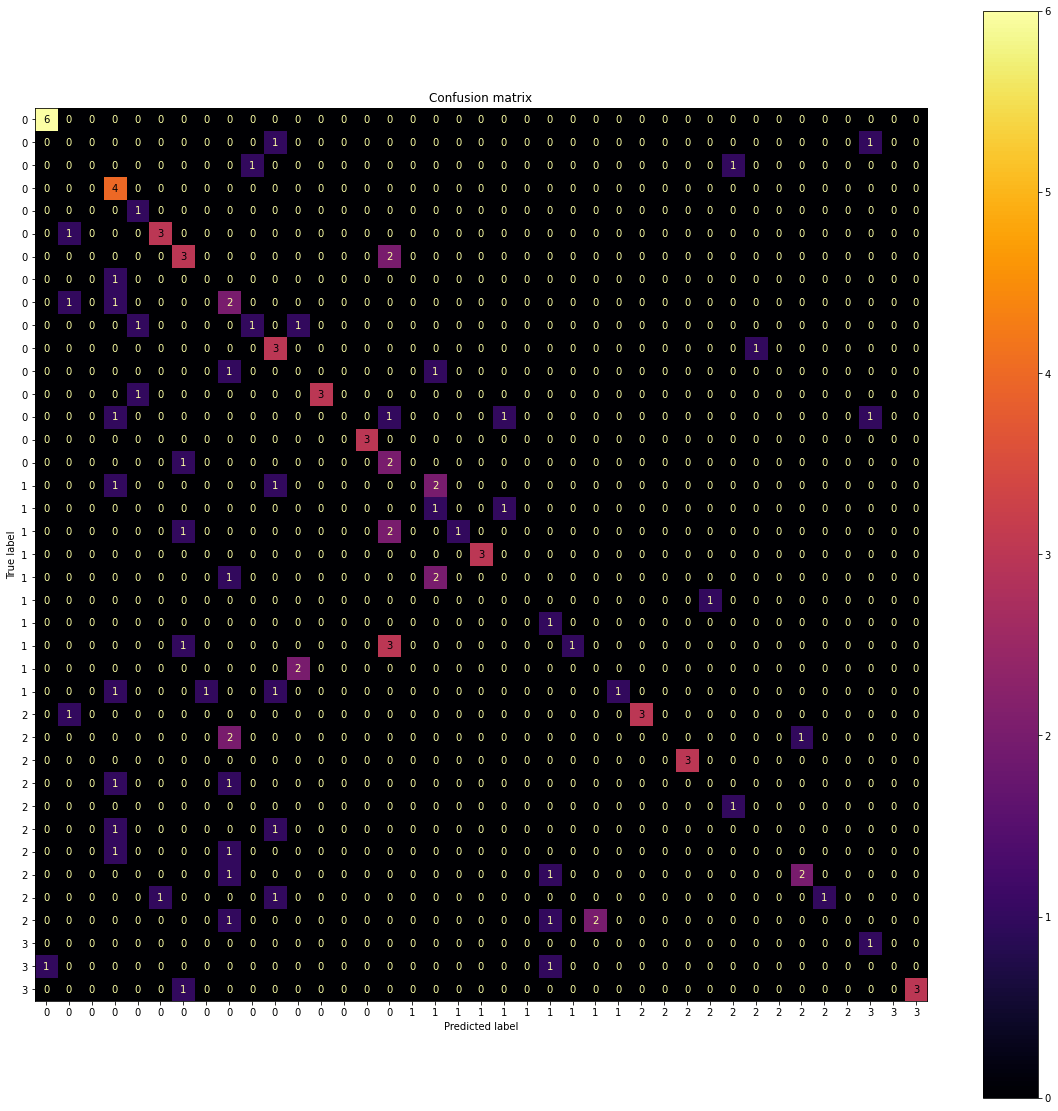

In [14]:
from sklearn.metrics import plot_confusion_matrix
class_names = dataset.Family
#plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(knn, x_test, y_test, display_labels=class_names, cmap=plt.cm.inferno , ax=ax )
plt.title('Confusion matrix')
plt.show()

In [15]:
cnf_matrix = confusion_matrix(y_test, y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(int)
FN = FN.astype(int)
TP = TP.astype(int)
TN = TN.astype(int)

In [16]:
print("============================================")
print(TP)
print("============================================")
print(TN)
print("============================================")
print(FP)
print("============================================")
print(FN)

[6 0 0 4 1 3 3 0 2 1 3 0 3 0 3 2 0 1 1 3 0 0 1 1 0 1 3 0 3 0 1 0 0 2 1 0 1
 0 3]
[109 111 114 104 113 111 107 114 104 112 107 111 112 112 113 105 112 109
 112 113 111 115 112 111 112 112 112 113 113 113 114 113 114 111 113 112
 113 114 112]
[1 3 0 8 2 1 4 1 8 1 5 3 0 0 0 8 0 5 0 0 2 0 3 0 2 0 0 0 0 1 1 1 0 1 0 0 2
 0 0]
[0 2 2 0 0 1 2 1 2 2 1 2 1 4 0 1 4 1 3 0 3 1 0 4 2 3 1 3 0 2 0 2 2 2 2 4 0
 2 1]


In [17]:
TPP = np.sum(TP)
TNN = np.sum(TN)
FPP = np.sum(FP)
FNN = np.sum(FN)

print(TPP)
print(TNN)
print(FPP)
print(FNN)

53
4345
63
63


In [18]:
Recall = TPP/(TPP+FNN)
print(Recall)
Precision = TPP/(TPP+FPP)
print(Precision)
Akurasi = (TPP+TNN)/(TPP+FPP+FNN+TNN)
print(Akurasi)

0.45689655172413796
0.45689655172413796
0.9721485411140584


In [15]:
dataset = pd.read_csv ("/home/dragneel/Documents/DataScience/Malware_Dataset_inisial.csv")
dataset

,2Grammed_APICalls_#0,2Grammed_APICalls_#1,2Grammed_APICalls_#2,2Grammed_APICalls_#3,2Grammed_APICalls_#4,2Grammed_APICalls_#5,2Grammed_APICalls_#8,2Grammed_APICalls_#11,2Grammed_APICalls_#12,2Grammed_APICalls_#13,...,PSH_Flag_Count,URG_Flag_Count,Init_Win_bytes_backward,act_data_pkt_fwd,Active_Std,Active_Min,Idle_Mean,Idle_Std,Idle_Min,Family
0,1,25,0,0,0,0,2,0,3,0,...,11,7,62414,102,2115149,5749717,193237066,19494258,178049428,0
1,3,36,0,0,2,0,37,0,6,5,...,12,7,62173,83,1508504,5751520,217579604,15523086,205667705,0
2,1,21,0,0,0,0,2,0,3,6,...,9,6,52184,81,1331682,5022349,242257116,13616452,231581606,0
3,1,21,0,12,0,0,13,0,1,1,...,8,7,49601,74,2086829,6104886,153203977,17081389,140411735,0
4,0,0,0,31,1,1,30,0,0,0,...,7,5,38518,37,978867,3867451,154841208,12765764,144120694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,1,2,0,0,0,0,0,0,90,77,...,13,7,78714,79,883018,7433773,212554035,11518994,203575810,38
301,1,1,0,0,0,0,0,0,3,26,...,22,14,199796,87,1504295,6948103,229395139,16809837,216392139,38
302,0,3,1,47,0,0,47,0,0,0,...,9,6,49098,68,729347,3746389,177521844,10518512,169313505,38
303,0,1,1,33,0,0,33,0,0,0,...,17,11,106782,82,1208814,5376501,186138726,14464033,174899102,38


In [16]:
x = dataset.drop(["Family"], axis=1)
x.head

<bound method NDFrame.head of      2Grammed_APICalls_#0  2Grammed_APICalls_#1  2Grammed_APICalls_#2  \
0                       1                    25                     0   
1                       3                    36                     0   
2                       1                    21                     0   
3                       1                    21                     0   
4                       0                     0                     0   
..                    ...                   ...                   ...   
300                     1                     2                     0   
301                     1                     1                     0   
302                     0                     3                     1   
303                     0                     1                     1   
304                     1                     1                     0   

     2Grammed_APICalls_#3  2Grammed_APICalls_#4  2Grammed_APICalls_#5  \
0                   

In [17]:
y = dataset["Family"]
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Family, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(y)
 
y= lb.transform(y)

In [19]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x)

x = scaler.transform(x)  


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np #create a new KNN model

knn_cv = KNeighborsClassifier(n_neighbors=3, p=2, metric = 'euclidean')#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x,y, cv=10)#print each cv score (accuracy) and average them

print(cv_scores)
print("===========================================================")
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.425      0.375      0.5        0.52777778 0.51428571 0.58823529
 0.69230769 0.63636364 0.61111111 0.42857143]
cv_scores mean:0.5298652654535008


/home/dragneel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [21]:
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# create model
model = (KNeighborsClassifier(n_neighbors=3, p=2, metric = 'euclidean'))
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=10)
# report performance
print(scores)
print('Accuracy: %.3f' % (mean(scores)))

[0.425      0.375      0.5        0.52777778 0.51428571 0.58823529
 0.69230769 0.63636364 0.61111111 0.42857143]
Accuracy: 0.530


/home/dragneel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [28]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y = np.array([number[0] for number in lb.fit_transform(y)])

recall = cross_val_score(model, x, y, cv=10, scoring='recall')
print('Recall', np.mean(recall), recall)
print("====================================================================")
precision = cross_val_score(model, x, y, cv=10, scoring='precision')
print('Precision', np.mean(precision), precision)
print("====================================================================")

Recall 0.8 [1.  0.5 0.5 1.  1.  1.  1.  1.  0.  1. ]
Precision 0.9 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
